# The Measurements Notebook

<div class="custom-button-row">
    <a 
        class="custom-button custom-download-button" href="../../notebooks/07_measurement_and_quantification/measurements.ipynb" download>
        <i class="fas fa-download"></i> Download this Notebook
    </a>
    <a
    class="custom-button custom-download-button" href="https://colab.research.google.com/github/HMS-IAC/bobiac/blob/gh-pages/colab_notebooks/07_measurement_and_quantification/measurements.ipynb" target="_blank">
        <img class="button-icon" src="../../_static/logo/icon-google-colab.svg" alt="Open in Colab">
        Open in Colab
    </a>
</div>

In [29]:
# /// script
# requires-python = ">=3.10"
# ///

# Standard library imports (no need to declare in dependencies)
import numpy as np
import matplotlib.pyplot as plt
import skimage
import pandas as pd
import scipy

## Boston Bioimage Analysis Course

Welcome to your next step in bioimage analysis!  
This notebook is written **like a small interactive book** to complement the lecture.

This notebook covers the following **core building blocks**:

| Chapter | Concept | Why it matters |
|---------|---------|----------------|
| 0 | [Introduction](#introduction) | Learn how to measure and quantify data from images |
| 1 | [Intensity and morphological features](#intensity-and-morphological-features) | Measure the intensity of an object |
| 2 | [Pandas DataFrame](#pandas-dataframe) | Improve the data structure by using a pandas dataframe |
| 3 | [Spatial features](#spatial-features) | Measure the location and relationship between objects |

Each chapter has:

1. **Narrative explanation** – read this like a textbook.
2. **📓 Examples** – run and play.
3. **✍️ Exercises** – your turn & guess the output!

***

## 0. Introduction

In this section, we will learn how to measure and quantify data from images, meaning how to go from images to numbers to plots. This process is often referred to as feature extraction. Feature extraction is the process of computing quantitative descriptors from image data that help capture relevant patterns, structures, or biological signals. In the context of microscopy, these features represent properties of cells, tissues, organelles, or other biological structures. Feature extraction bridges raw image data with biological insight, enabling classification, clustering, and statistical analysis.

There are three broad types of features typically extracted:

- Intensity features: Related to the pixel brightness distribution.
- Morphological features: Describe shape and size.
- Spatial features: Capture location and relationship between structures.

These features can be computed on entire images or, more commonly, on segmented regions of interest (ROIs), such as individual nuclei or cells.
In this section, we will focus on intensity features.

Let's load our raw and segmented images (labeled images):

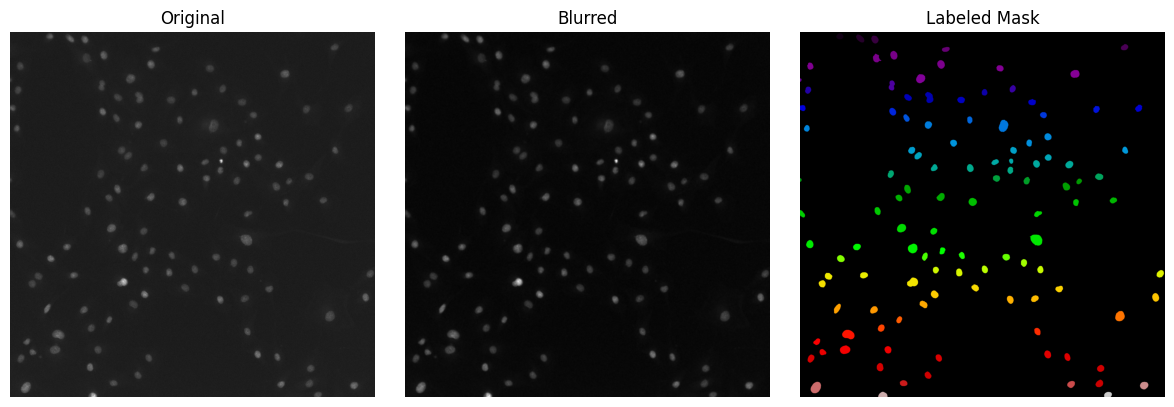

In [8]:
# give the code to segment the image with gaussian blur and thresholding
image = skimage.io.imread('../../_static/data/DAPI_wf_10.tif')

# Apply Gaussian blur to reduce noise
blurred = skimage.filters.gaussian(image, sigma=2)

# Apply Otsu thresholding to create binary mask
threshold = skimage.filters.threshold_otsu(blurred)
binary_mask = blurred > threshold

# Label connected components
labeled_mask = skimage.measure.label(binary_mask)

# Display results
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.imshow(image, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(132) 
plt.imshow(blurred, cmap='gray')
plt.title('Blurred')
plt.axis('off')

plt.subplot(133)
plt.imshow(labeled_mask, cmap='nipy_spectral')
plt.title('Labeled Mask')
plt.axis('off')

plt.tight_layout()
plt.show()



The [`skimage.measure`](https://scikit-image.org/docs/stable/api/skimage.measure.html) module from **scikit-image** provides several tools to measure properties of image regions. It is especially powerful when working with **labeled segmentation masks**, where each object in an image is assigned a unique integer label.

This module is a foundational tool for extracting morphological and intensity-based features from binary or labeled images.


The core feature extraction function in `skimage.measure` is:

```python

skimage.measure.regionprops(label_image, intensity_image=None)

```

**Parameters:**
- `label_image` — A 2D or 3D array where **each unique non-zero integer** corresponds to a labeled object (typically from `skimage.measure.label`).
- `intensity_image` *(optional)* — The raw grayscale image associated with the label mask, used to compute intensity features like mean or standard deviation.

**Returns:**
- A list of `RegionProperties` objects — one for each labeled object. Each object contains attributes describing shape, position, and optionally intensity.




**Common Features Extracted:**


| Measurement | Description |
|-------------|-------------|
| area | Measures the number of pixels in the object (size) |
| perimeter | Approximates the length around the object |
| eccentricity | Quantifies elongation—how stretched the shape is |
| solidity | Indicates shape irregularity by comparing area to convex area |
| extent | Compares object area to its bounding box area |
| orientation | Measures the angle of the major axis of the object |
| mean_intensity | Averages pixel values inside the region (if intensity image is given) |
| max_intensity | Finds the brightest pixel value inside the object |
| intensity_image | Extracts the raw intensity image cropped to the object |
| centroid | Finds the object's center of mass (position in the image) |
| bbox | Gives the bounding box coordinates of the object |


***

## 1. Intensity and morphological features

 Note: what is the difference between `regionprops` and `regionprops_table`?

 - `regionprops` returns a list of RegionProperties objects, where each object contains 
   attributes that can be accessed like props[0].area, props[0].perimeter, etc.
   This is useful for interactive exploration and when you need to work with individual regions.

 - `regionprops_table` returns a pandas DataFrame where each row represents a region and 
   columns are the properties. This format is more convenient for data analysis and when you 
   want to work with all regions at once in a tabular format.
   Example: props_df = regionprops_table(label_image, properties=['area', 'perimeter'])


In [12]:
# Load sample image
label_image = skimage.measure.label(labeled_mask)

# Extract region properties
props = skimage.measure.regionprops(label_image, intensity_image=image)

# Explore the data types and structure
print("Understanding regionprops output:")
print(f"props is a {type(props)} containing {len(props)} regions")
print(f"Each region is a {type(props[0])} object")

# Show available properties for each region
print("\nAvailable properties for each region:")
print(dir(props[0]))  # Use dir() to see available attributes

# Print some properties for the first region
print("\nProperties for region #1:")
print(f"Area: {props[0].area} pixels (type: {type(props[0].area)})")
print(f"Perimeter: {props[0].perimeter:.2f} pixels (type: {type(props[0].perimeter)})")
print(f"Eccentricity: {props[0].eccentricity:.2f} (type: {type(props[0].eccentricity)})")
print(f"Mean intensity: {props[0].mean_intensity:.2f} (type: {type(props[0].mean_intensity)})")

# Show how to access multiple regions
print("\nAccessing multiple regions:")
print(f"Number of regions: {len(props)}")
print(f"Areas of first 3 regions: {[prop.area for prop in props[:3]]}")

Understanding regionprops output:
props is a <class 'list'> containing 115 regions
Each region is a <class 'skimage.measure._regionprops.RegionProperties'> object

Available properties for each region:
['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__firstlineno__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__static_attributes__', '__str__', '__subclasshook__', '__weakref__', '_cache', '_cache_active', '_extra_properties', '_image_intensity_double', '_intensity_image', '_label_image', '_multichannel', '_ndim', '_offset', '_pixel_area', '_slice', '_spacing', '_spatial_axes', 'area', 'area_bbox', 'area_convex', 'area_filled', 'axis_major_length', 'axis_minor_length', 'bbox', 'centroid', 'centroid_local', 'centroid_weighted

### ✍️ Exercise: Find how to extract the following features from the image: median intensity, skewness, and circularity.
Note: look at the [documentation](https://scikit-image.org/docs/0.25.x/api/skimage.measure.html#skimage.measure.regionprops) of `regionprops` to find the features you need.

Now that we have learned how to measure and quantify data from images, we can plot the results.

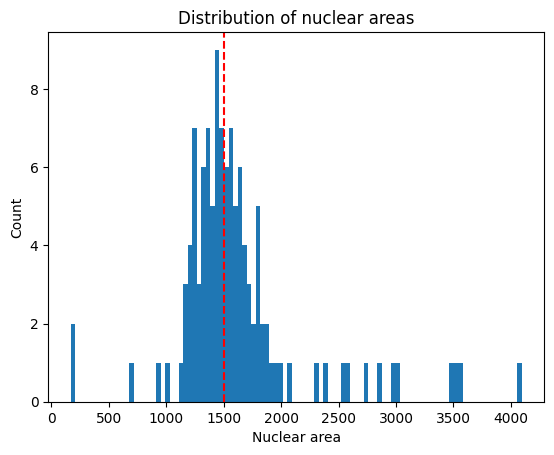

In [13]:
# repeat
props = skimage.measure.regionprops(label_image)

areas = [prop.area for prop in props]

# plot the destribution of nuclear area in the image
plt.hist(areas, bins=100)
plt.xlabel("Nuclear area")
plt.ylabel("Count")
plt.title("Distribution of nuclear areas")

# add a vertical line at the median area
plt.axvline(np.median(areas), color="red", linestyle="--")
plt.show()

Question: what are the units of the area?

This is great! But, we can improve the data structure by using a pandas dataframe.

***

## 2. Pandas DataFrame

In this section, we will learn how to improve the data structure by using a pandas dataframe.

**What is a pandas dataframe?**

A pandas dataframe is a two-dimensional, size-mutable, heterogeneous tabular data structure with labeled axes (rows and columns). It is similar to a table in a relational database or an Excel spreadsheet.

**How to create a pandas dataframe?**

```python
import pandas as pd

df = pd.DataFrame(data)
```

**How to add a column to a pandas dataframe?**

 ```python
 df['new_column'] = values
 ```
 
 For example:
 ```python
 df['area_squared'] = df['area'] ** 2
 ```

**How to save a pandas dataframe to a csv file?**

```python
df.to_csv('dataframe.csv', index=False)
```

**How to load a pandas dataframe from a csv file?**

```python
df = pd.read_csv('dataframe.csv')
```






### ✍️ Exercise: add a new column to the dataframe with the circularity of the nuclei, then save the dataframe to a csv file.


In [14]:
# Create a simple dataframe with some data
measurements = {
    'name': ['Cell 1', 'Cell 2', 'Cell 3'],
    'area': [100.5, 120.3, 95.7],
    'perimeter': [40.2, 45.1, 38.9]
}
df = pd.DataFrame(measurements)
print("Basic dataframe:")
print(df)
print("\n")

Basic dataframe:
     name   area  perimeter
0  Cell 1  100.5       40.2
1  Cell 2  120.3       45.1
2  Cell 3   95.7       38.9




In [15]:
# solution to add a new column to the dataframe with the circularity of the nuclei
df['circularity'] = 4 * np.pi * df['area'] / (df['perimeter'] ** 2)
print("Dataframe with calculated column:")
print(df)

Dataframe with calculated column:
     name   area  perimeter  circularity
0  Cell 1  100.5       40.2     0.781491
1  Cell 2  120.3       45.1     0.743229
2  Cell 3   95.7       38.9     0.794735


In [16]:
# save to csv
df.to_csv('dataframe.csv', index=False)

# check if saved by loading
df = pd.read_csv('dataframe.csv')
print(df)

     name   area  perimeter  circularity
0  Cell 1  100.5       40.2     0.781491
1  Cell 2  120.3       45.1     0.743229
2  Cell 3   95.7       38.9     0.794735


***

## 3. Spatial Features

### Measuring average distance between cells
 
 When analyzing spatial relationships between cells, measuring the average distance between cells is a common task. Here are some approaches:

 1. **Centroid-based distance**: Calculate distances between cell centroids
    - Get x,y coordinates of cell centers
    - Use pairwise distance calculations (e.g. Euclidean distance)
    - Average all pairwise distances

 2. **Nearest neighbor distance**: For each cell, find distance to closest neighbor
    - More relevant for analyzing cell clustering
    - Can use scipy.spatial functions like KDTree

 3. **Edge-to-edge distance**: Measure actual distance between cell boundaries
    - More computationally intensive
    - Requires good segmentation masks
    - Important for cell contact analysis

 The choice depends on your biological question - centroid distances work well for overall spatial patterns, while edge distances matter more for cell-cell interactions.


**Let's start with a simple example: measuring the average distance between cells.**

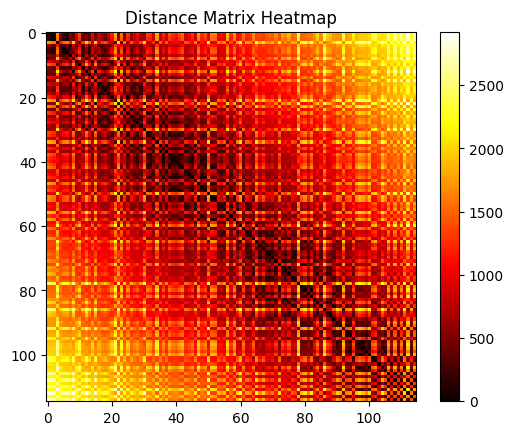

   label  centroid-0   centroid-1
0      1   27.185213   251.365091
1      2   40.771167   379.628146
2      3   46.806825   472.303644
3      4   96.341229  2048.690600
4      5  109.274262   920.126582

Median distance between centroids: 1101.62 pixels


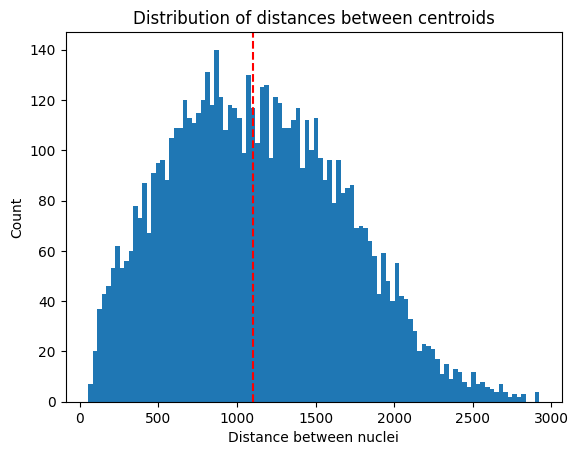

In [ ]:
# Extract morphological (shape) features
props_centroids = skimage.measure.regionprops_table(label_image, properties=['label', 'centroid'])
df_centroids = pd.DataFrame(props_centroids)

# Combine row,col coordinates
centroids = np.column_stack((df_centroids['centroid-0'], df_centroids['centroid-1']))

# Calculate pairwise distances efficiently
dist_array = scipy.spatial.distance.pdist(centroids)  # condensed distance vector, excludes diagonal
distance_matrix = scipy.spatial.distance.squareform(dist_array)  # square symmetric matrix

# Show heatmap
plt.imshow(distance_matrix, cmap='hot')
plt.colorbar()
plt.title("Distance Matrix Heatmap")
plt.show()

# Summary statistics
median_distance = np.median(dist_array)
print(df_centroids.head())
print(f"\nMedian distance between centroids: {median_distance:.2f} pixels")

# Plot distribution
plt.hist(dist_array, bins=100)
plt.xlabel("Distance between nuclei")
plt.ylabel("Count")
plt.title("Distribution of distances between centroids")
plt.axvline(median_distance, color="red", linestyle="--")
plt.show()
